In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [22]:
df= pd.read_csv('../data/market_integrates_3.csv')




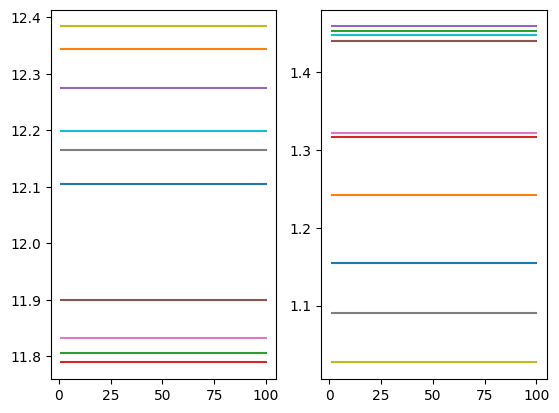

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.characteristic1)
    ax2.plot(df_firm.market_ids, df_firm.characteristic2)



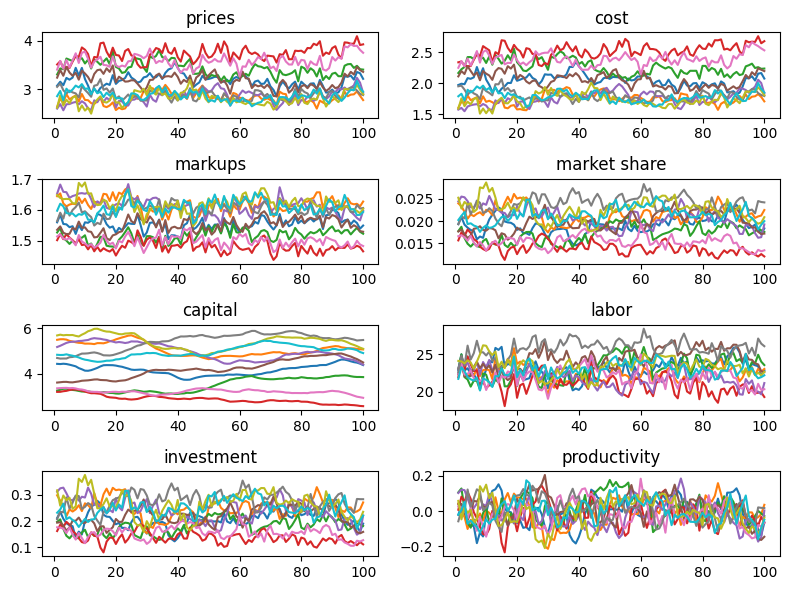

In [24]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(8,6))

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.prices)
    ax2.plot(df_firm.market_ids, df_firm.marginal_cost)
    ax3.plot(df_firm.market_ids, df_firm.markups)
    ax4.plot(df_firm.market_ids, df_firm.shares)
    ax5.plot(df_firm.market_ids, df_firm.capital)
    ax6.plot(df_firm.market_ids, df_firm.labor)
    ax7.plot(df_firm.market_ids, df_firm.investment)
    ax8.plot(df_firm.market_ids, df_firm.productivity)


ax1.set_title('prices')
ax2.set_title('cost')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax8.set_title('productivity')


plt.tight_layout()
plt.show()

In [25]:
# df_cc = pd.read_csv('../data/market_constant_cost100.csv')
df_grouped_cc = df.groupby('firm_ids')
# Look at the firm with bad product charactristics
group1_cc = df_grouped_cc.get_group(2)
# Look at a firm with good product characteristics
group4_cc = df_grouped_cc.get_group(4)




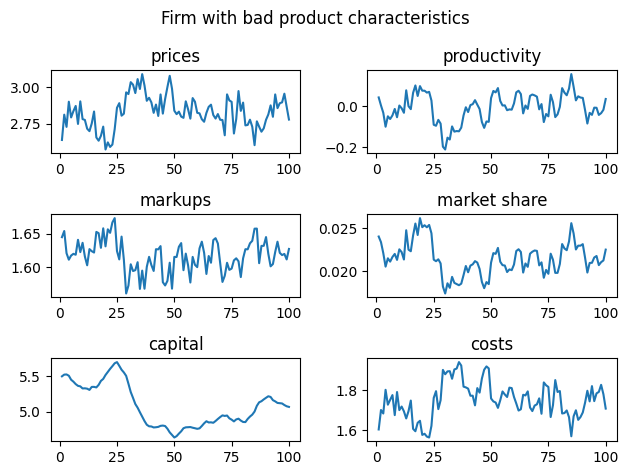

In [26]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with bad product characteristics')

ax1.plot(group1_cc.market_ids, group1_cc.prices)
ax2.plot(group1_cc.market_ids, group1_cc.productivity)
ax3.plot(group1_cc.market_ids, group1_cc.markups)
ax4.plot(group1_cc.market_ids, group1_cc.shares)
ax5.plot(group1_cc.market_ids, group1_cc.capital)
ax6.plot(group1_cc.market_ids, group1_cc.marginal_cost)

ax1.set_title('prices')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()


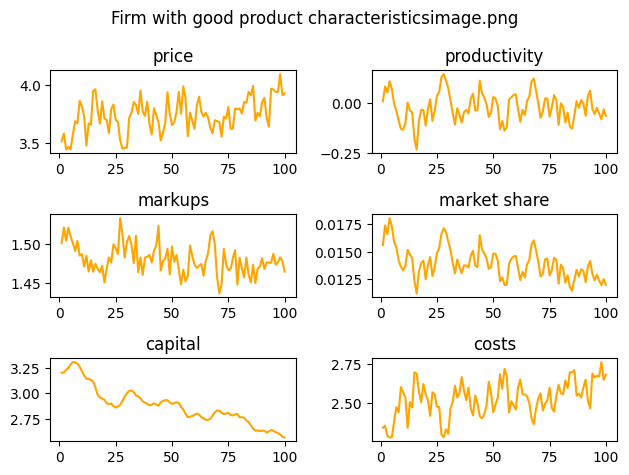

In [27]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with good product characteristicsimage.png')

ax1.plot(group4_cc.market_ids, group4_cc.prices, color='orange')
ax2.plot(group4_cc.market_ids, group4_cc.productivity, color='orange')
ax3.plot(group4_cc.market_ids, group4_cc.markups, color='orange')
ax4.plot(group4_cc.market_ids, group4_cc.shares, color='orange')
ax5.plot(group4_cc.market_ids, group4_cc.capital, color='orange')
ax6.plot(group4_cc.market_ids, group4_cc.marginal_cost, color='orange')

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()

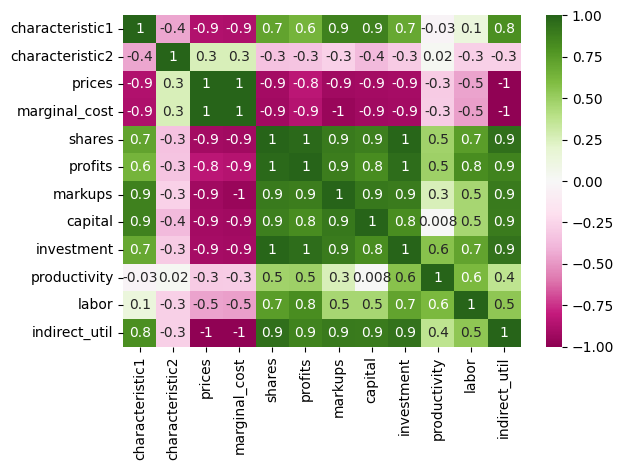

In [28]:
# heatmap_df = df.drop(['market_ids','firm_ids', 'characteristic1', 'characteristic2', 'e_quantity'], axis=1)
heatmap_df = df.drop(['market_ids','firm_ids', 'e_quantity'], axis=1)

fig = sns.heatmap(heatmap_df.corr(), vmin = -1., vmax=1., cmap="PiYG", annot=True, fmt='1.0001g')
plt.tight_layout() 
plt.savefig('correlation_map_model.pdf')

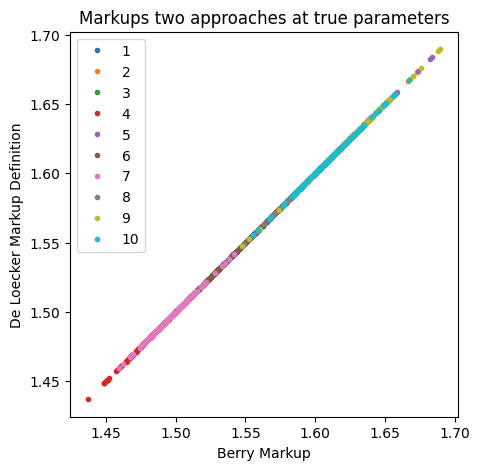

In [29]:
# markups_deloecker = (0.3**2)*(df.prices*(df.e_quantity/(np.exp(1+df.productivity)*df.capital**0.7)))/((0.5**2)*df.labor)
# markup_hall = (df.e_quantity/0.3*df.labor)
markups_deloecker = (0.3*df.prices*df.e_quantity)/(0.5*df.labor)
df['markups_deloecker'] = markups_deloecker

x45 = [0.5, 3.5]
y45 = [0.5, 3.5]


groups = df.groupby('firm_ids')

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.markups, group.markups_deloecker, marker='o', linestyle='', ms=3, label=name)
ax.legend()
# plt.plot(x45, y45)
plt.title("Markups two approaches at true parameters")
plt.xlabel("Berry Markup")
plt.ylabel("De Loecker Markup Definition")
plt.show()


# plt.scatter(df.markups, markups_deloecker, color='pink')
# # plt.scatter(df.markups, markups_hall)
# plt.show()

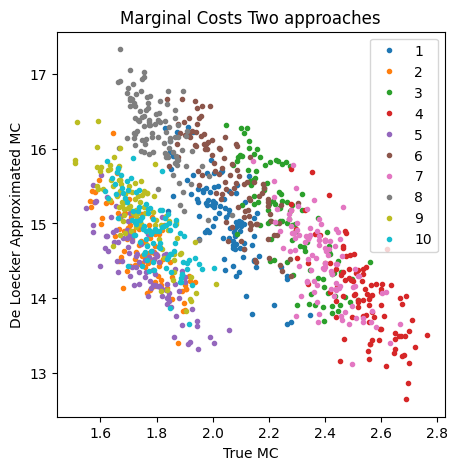

     market_ids  firm_ids  characteristic1  characteristic2    prices  \
0             1         1        12.105342         1.154248  3.075780   
1             1         2        12.343201         1.242120  2.636836   
2             1         3        11.804839         1.452872  3.306896   
3             1         4        11.788775         1.317239  3.512838   
4             1         5        12.274580         1.458880  2.601472   
..          ...       ...              ...              ...       ...   
995         100         6        11.899933         1.439592  3.359908   
996         100         7        11.832257         1.321546  3.755300   
997         100         8        12.165858         1.090067  2.881068   
998         100         9        12.383881         1.026988  2.897042   
999         100        10        12.198114         1.447958  2.949040   

     marginal_cost    shares   profits   markups  e_quantity   capital  \
0         1.972267  0.019291  0.021287  1.559515 

In [30]:
# Check the same think on the marginal cost
mc_deloecker = (0.5/0.3)*(df.labor/(df.e_quantity/(np.exp(1+df.productivity)*df.capital**0.7)))
# markup_hall = (df.e_quantity/0.3*df.labor)
df['mc_deloecker'] = mc_deloecker

# x45 = [0.5, 3.5]
# y45 = [0.5, 3.5]


groups = df.groupby('firm_ids')

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.marginal_cost, group.mc_deloecker, marker='o', linestyle='', ms=3, label=name)
ax.legend()
# plt.plot(x45, y45)
plt.title("Marginal Costs Two approaches")
plt.xlabel("True MC")
plt.ylabel("De Loecker Approximated MC")
plt.show()


print(df)